In [2]:
#项目10-例10-1代码
#导入鸢尾花数据集
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler #导入数据预处理类
from sklearn.model_selection import train_test_split

#提取花瓣长度与花瓣宽度作为特征变量
x1,y=load_iris().data[:,2:4],load_iris().target  
#数据标准化处理
scaler=StandardScaler().fit(x1) #数据标准化
x=scaler.transform(x1)#转换数据集
#拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=50) #将数据集拆分为训练集与测试集

In [3]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
#模型训练
model=MLPClassifier(solver='lbfgs',activation='logistic',max_iter=1000,random_state=1)
model.fit(x_train,y_train)

#模型评估
re=classification_report(y_test,model.predict(x_test))
print('模型评估报告：')
print(re)

模型评估报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



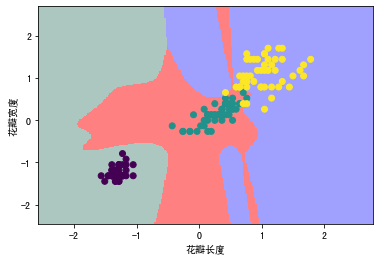

In [4]:
#使用Matplotlib绘制分类界面，显示分类结果
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
#绘制分割区域
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1		#寻找横坐标的范围
y_min,y_max=x[:,1].min()-1,x[:,1].max()+1		#寻找纵坐标的范围
#在特征范围内以步长为0.02预测每个点的输出结果
x1,x2=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))					
Z=model.predict(np.c_[x1.ravel(),x2.ravel()])	#预测测试点的值
Z=Z.reshape(x1.shape) 
iris_cmap=ListedColormap(["#ACC6C0","#FF8080","#A0A0FF"])				#设置分类界面的颜色
plt.pcolormesh(x1,x2,Z,cmap=iris_cmap)	#绘制分类界面
#绘制散点图
plt.scatter(x[:,0],x[:,1],c=y)
#设置坐标轴的名称并显示图形
plt.rcParams['font.sans-serif']='Simhei'	#中文文字设置为黑体
plt.rcParams['axes.unicode_minus']=False		#解决负号显示不正常的问题
plt.xlabel('花瓣长度')						#图形横轴的标签名称
plt.ylabel('花瓣宽度')						#图形纵轴的标签名称
plt.show()
